In [ ]:
import pandas as pd
import gzip
import json
import warnings

# Ignore all warnings
warnings.filterwarnings("ignore")

data = []

# Open the .gz file
with gzip.open('AMAZON_FASHION.json.gz', 'r') as file:
    for line in file:
        try:
            data.append(json.loads(line.decode('utf-8')))
        except ValueError as e:
            print(f"Error parsing line: {e}")

# Convert the list of dictionaries into a DataFrame
df = pd.DataFrame(data)

# **# 1. Data exploration**

In [ ]:
# Printing an overview of the dataset by displaying the first few rows
print("Dataset Overview:")
print(df.head())

Dataset Overview:
   overall  verified   reviewTime      reviewerID        asin  reviewerName  \
0      5.0      True  10 20, 2014  A1D4G1SNUZWQOT  7106116521         Tracy   
1      2.0      True  09 28, 2014  A3DDWDH9PX2YX2  7106116521     Sonja Lau   
2      4.0     False  08 25, 2014  A2MWC41EW7XL15  7106116521      Kathleen   
3      2.0      True  08 24, 2014  A2UH2QQ275NV45  7106116521   Jodi Stoner   
4      3.0     False  07 27, 2014   A89F3LQADZBS5  7106116521  Alexander D.   

                                          reviewText  \
0                             Exactly what I needed.   
1  I agree with the other review, the opening is ...   
2  Love these... I am going to order another pack...   
3                                too tiny an opening   
4                                               Okay   

                                             summary  unixReviewTime vote  \
0                             perfect replacements!!      1413763200  NaN   
1  I agree with 

In [ ]:
# Printing the shape of the dataset (number of rows and columns)
print("\nDataset shape:", df.shape)


Dataset shape: (883636, 12)


In [ ]:
# Printing the column names of the dataset
print(df.columns)

Index(['overall', 'verified', 'reviewTime', 'reviewerID', 'asin',
       'reviewerName', 'reviewText', 'summary', 'unixReviewTime', 'vote',
       'style', 'image'],
      dtype='object')


In [ ]:
# Printing information about the dataset including the data types, non-null counts, and memory usage
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 883636 entries, 0 to 883635
Data columns (total 12 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   overall         883636 non-null  float64
 1   verified        883636 non-null  bool   
 2   reviewTime      883636 non-null  object 
 3   reviewerID      883636 non-null  object 
 4   asin            883636 non-null  object 
 5   reviewerName    883544 non-null  object 
 6   reviewText      882403 non-null  object 
 7   summary         883103 non-null  object 
 8   unixReviewTime  883636 non-null  int64  
 9   vote            79900 non-null   object 
 10  style           304569 non-null  object 
 11  image           28807 non-null   object 
dtypes: bool(1), float64(1), int64(1), object(9)
memory usage: 75.0+ MB
None


Dropping 'vote' and 'image' columns because they contain 90-96% of missing values (vote - 79900, image - 28807), and their descriptions also indicates that they are not crucial. 'vote' column is the helpful votes of the review and 'image' column is the images that users post after they have received the product.

In [ ]:
# Printing the column names before dropping any columns
print(df.columns)

# Dropping columns named 'vote' and 'image' from the dataframe
df = df.drop(columns=['vote','image'])

Index(['overall', 'verified', 'reviewTime', 'reviewerID', 'asin',
       'reviewerName', 'reviewText', 'summary', 'unixReviewTime', 'vote',
       'style', 'image'],
      dtype='object')


In [ ]:
# Printing the shape of the DataFrame before removing duplicates
print("Shape of DataFrame before removing duplicates:", df.shape)

# Printing the column names of the DataFrame
print(df.columns)

Shape of DataFrame before removing duplicates: (883636, 10)
Index(['overall', 'verified', 'reviewTime', 'reviewerID', 'asin',
       'reviewerName', 'reviewText', 'summary', 'unixReviewTime', 'style'],
      dtype='object')


In [ ]:
# Filling missing 'reviewText' values with corresponding 'summary' values
df['reviewText'].fillna(df['summary'], inplace=True)

# Filling any remaining missing values in 'reviewText' and all missing values in 'style' with an empty string or a placeholder
df.fillna({'style': '', 'reviewText': ''}, inplace=True)

# **a. Counts, averages**

In [ ]:
# Calculating the total number of reviews
num_reviews = len(df)

# Calculating the average rating
avg_rating = df['overall'].mean()

# Printing the total number of reviews and the average rating
print("Total number of reviews:", num_reviews)
print("Average rating:", avg_rating)

Total number of reviews: 883636
Average rating: 3.9069401880412298


In [ ]:
# Calculating the number of unique categories (ASINs) in the dataset
cat = len(df['asin'].unique())
print("Number of Categories: ", cat)

# Calculating the number of unique users (reviewer IDs) in the dataset
usr = len(df['reviewerID'].unique())
print("Number of Users", usr)

Number of Categories:  186189
Number of Users 749233


In [ ]:
# Calculating the distribution of reviews per day
reviews_per_day = df['reviewTime'].value_counts()

# Printing the distribution of reviews per day
print("Distribution of reviews per day: ", reviews_per_day)

Distribution of reviews per day:  reviewTime
01 15, 2016    3241
04 18, 2016    3219
07 18, 2017    2390
07 15, 2016    1997
04 19, 2016    1871
               ... 
09 14, 2005       1
09 16, 2005       1
09 22, 2005       1
06 13, 2005       1
12 28, 2003       1
Name: count, Length: 4608, dtype: int64


In [ ]:
# Calculating the distribution of reviews per rating
reviews_per_rating = df['overall'].value_counts()

# Printing the distribution of reviews per rating
print("Distribution of reviews per rating: ", reviews_per_rating)

Distribution of reviews per rating:  overall
5.0    465476
4.0    149331
1.0    107080
3.0     97031
2.0     64718
Name: count, dtype: int64


In [ ]:
# Reviews per rating
print(reviews_per_rating)

overall
5.0    465476
4.0    149331
1.0    107080
3.0     97031
2.0     64718
Name: count, dtype: int64


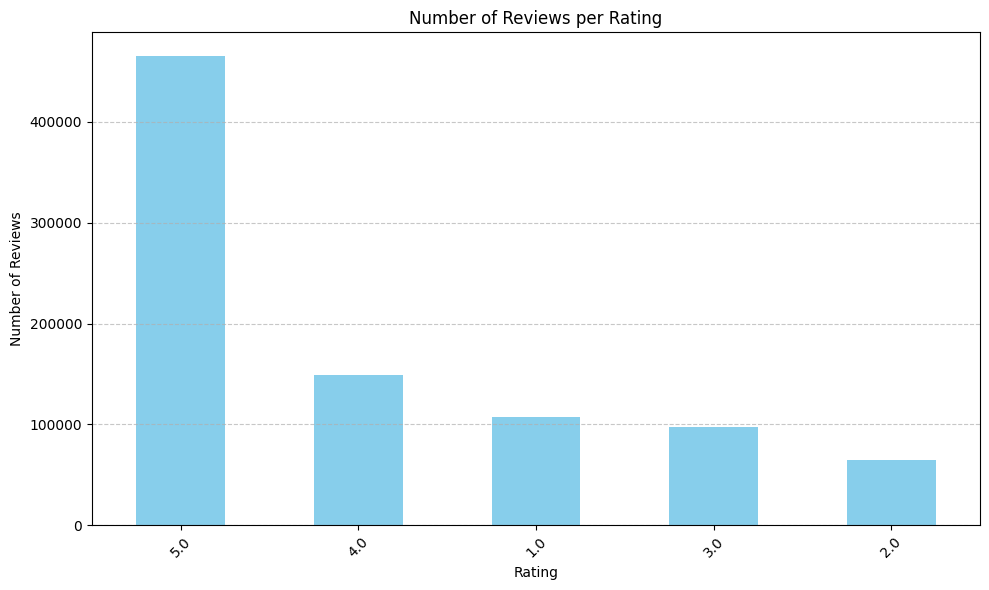

In [ ]:
import matplotlib.pyplot as plt

# Plotting a histogram of the distribution of reviews per rating
plt.figure(figsize=(10, 6))
reviews_per_rating.plot(kind='bar', color='skyblue')
plt.title('Number of Reviews per Rating')
plt.xlabel('Rating')
plt.ylabel('Number of Reviews')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [ ]:
#Product Category with the highest number of rating of 5
# Filter the DataFrame to include only rows where the 'overall' rating is 5
ratings_of_5 = df[df['overall'] == 5]

# Group the filtered DataFrame by the 'asin' column and count the number of rows for each 'asin' group
rating_counts = ratings_of_5.groupby('asin').size()

# Find the 'asin' with the highest count
product_with_highest_5_ratings = rating_counts.idxmax()

# Filter the original DataFrame to include only rows for the 'asin' with the highest rating of 5
reviews_of_highest_rated_product = df[df['asin'] == product_with_highest_5_ratings]

# Count the total number of reviews for the product with the highest rating of 5
num_reviews_highest_rated_product = len(reviews_of_highest_rated_product)

# Print the 'asin' with the highest number of ratings of 5
print("Product with the highest number of ratings of 5:", product_with_highest_5_ratings,"with", num_reviews_highest_rated_product,"reviews")

Product with the highest number of ratings of 5: B00RLSCLJM with 3638 reviews


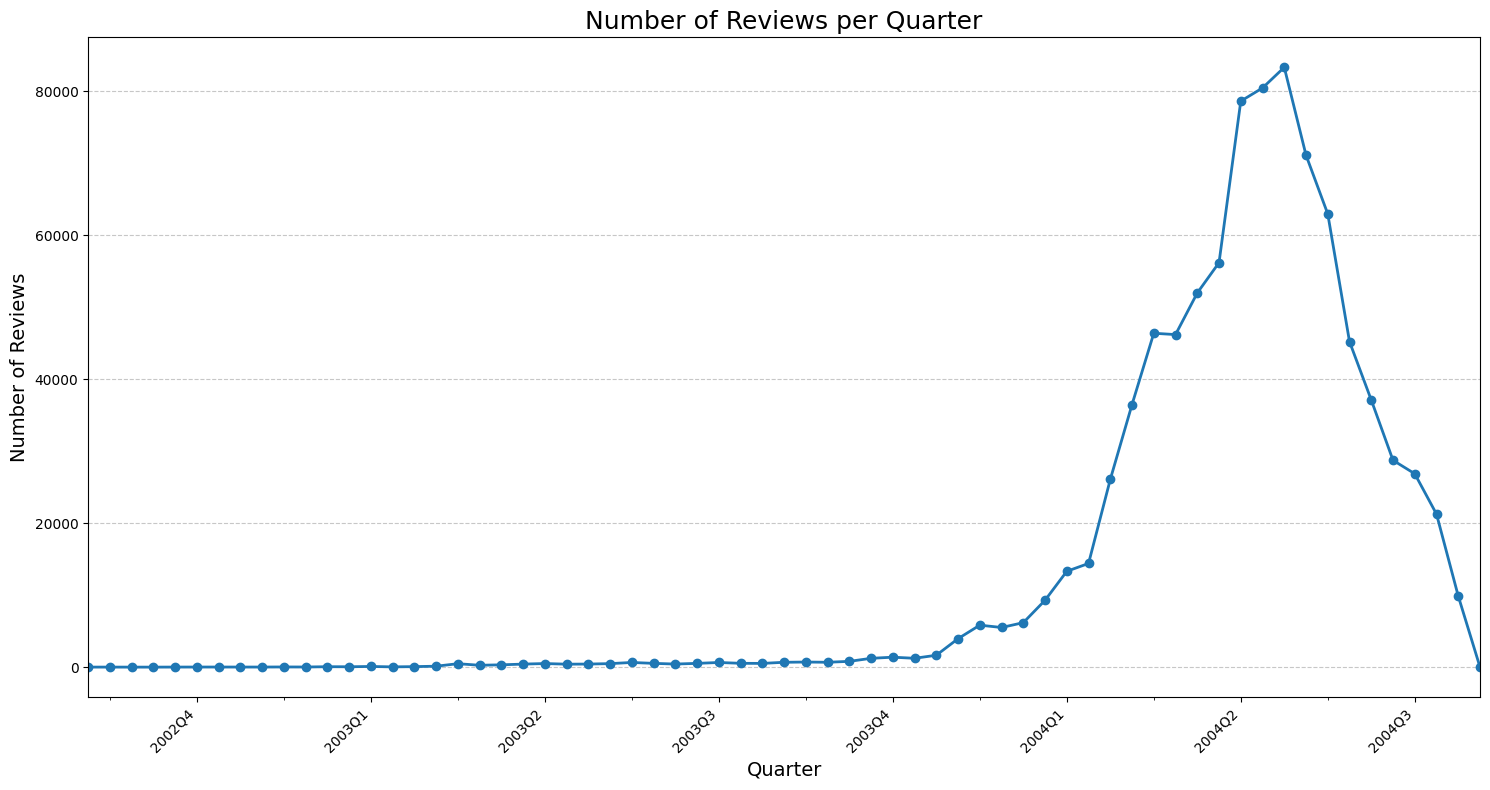

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd


# Group the data by quarter
# Ensure that the 'reviewTime' column is a datetime dtype
df['reviewTime'] = pd.to_datetime(df['reviewTime'])

# Now you can convert to a period and group by quarter
df['reviewQuarter'] = df['reviewTime'].dt.to_period('Q')
reviews_per_quarter = df.groupby('reviewQuarter').size()

# Plotting the data
plt.figure(figsize=(15, 8))
reviews_per_quarter.plot(marker='o', linestyle='-', linewidth=2)

# Formatting the plot
plt.title('Number of Reviews per Quarter', fontsize=18)
plt.xlabel('Quarter', fontsize=14)
plt.ylabel('Number of Reviews', fontsize=14)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Setting the x-axis labels to be more readable
plt.xticks(rotation=90)
plt.gca().set_xticklabels([str(p) for p in reviews_per_quarter.index], rotation=45, ha='right')

plt.tight_layout()
plt.show()

# **b. Distribution of the number of reviews across products**

In [ ]:
# Calculating the distribution of reviews across products
reviews_per_product = df['asin'].value_counts()

# Printing the distribution of reviews across products
print("Distribution of reviews across products: \n", reviews_per_product)

Distribution of reviews across products: 
 asin
B000V0IBDM    4384
B000KPIHQ4    4375
B00I0VHS10    3889
B00RLSCLJM    3638
B000PHANNM    2572
              ... 
B00VQHSOE0       1
B00VQH61O0       1
B00VQGEHII       1
B00VQGZT76       1
B01HJG5NMW       1
Name: count, Length: 186189, dtype: int64


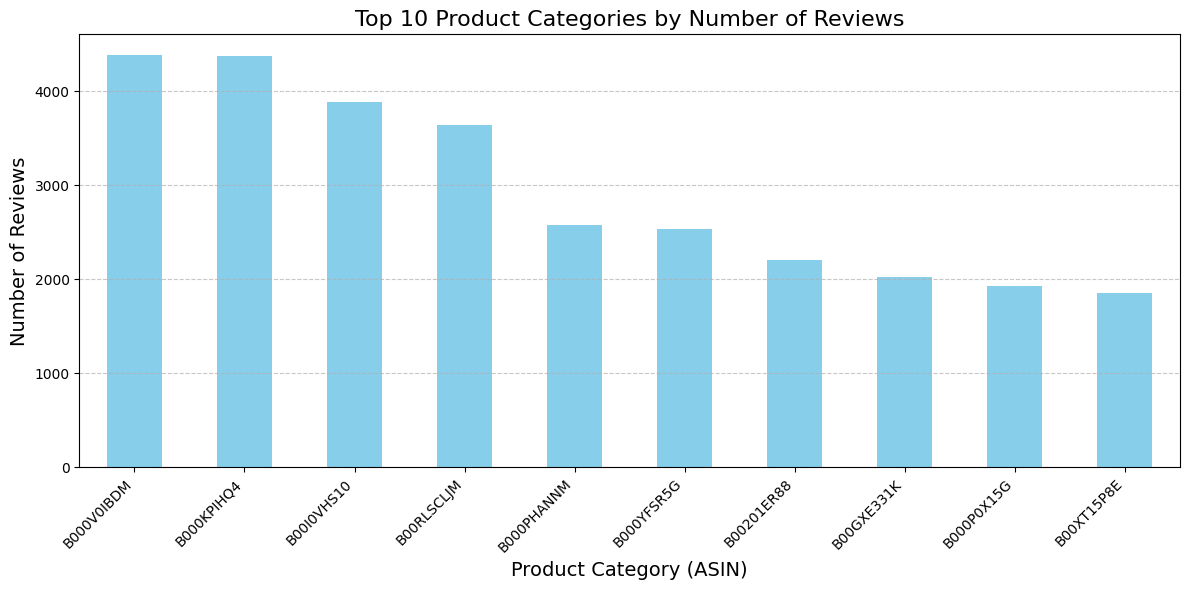

In [ ]:
import matplotlib.pyplot as plt

# Get the top 10 most reviewed products
top_reviews_per_product = reviews_per_product.head(10)

# Plotting the data
plt.figure(figsize=(12, 6))
top_reviews_per_product.plot(kind='bar', color='skyblue')

# Formatting the plot
plt.title('Top 10 Product Categories by Number of Reviews', fontsize=16)
plt.xlabel('Product Category (ASIN)', fontsize=14)
plt.ylabel('Number of Reviews', fontsize=14)
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

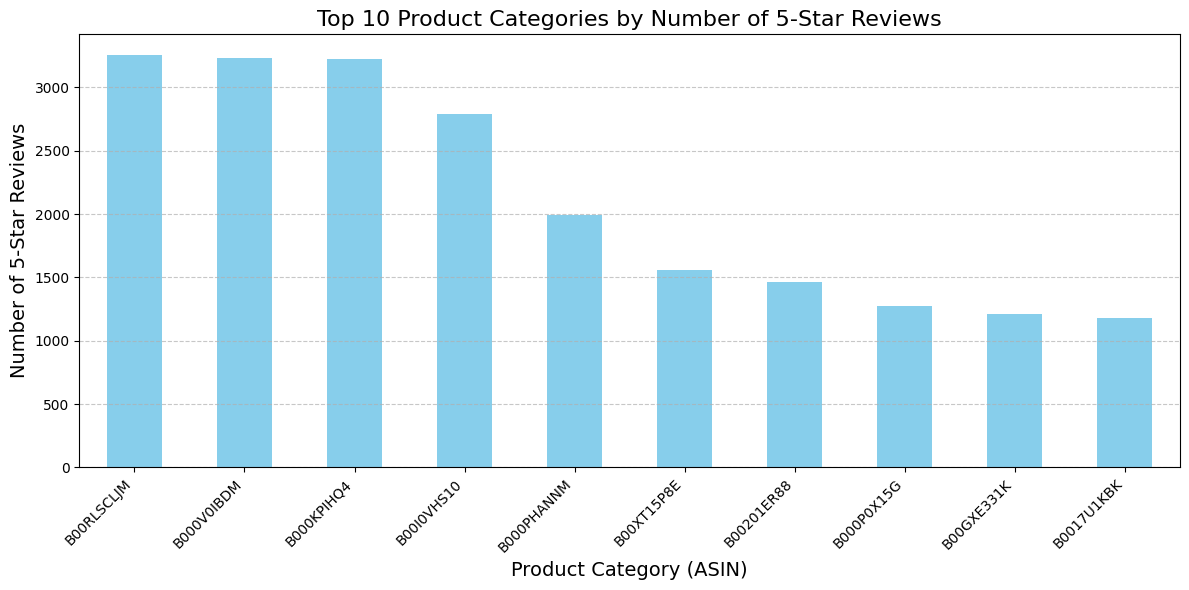

In [ ]:
import matplotlib.pyplot as plt

# Filter the DataFrame for reviews with a rating of 5
five_star_reviews = df[df['overall'] == 5]

# Calculate the distribution of five-star reviews across products
five_star_reviews_per_product = five_star_reviews['asin'].value_counts()

# Get the top N categories for five-star reviews (e.g., top 10)
top_five_star_reviews = five_star_reviews_per_product.head(10)

# Plotting the data
plt.figure(figsize=(12, 6))
top_five_star_reviews.plot(kind='bar', color='skyblue')

# Formatting the plot
plt.title('Top 10 Product Categories by Number of 5-Star Reviews', fontsize=16)
plt.xlabel('Product Category (ASIN)', fontsize=14)
plt.ylabel('Number of 5-Star Reviews', fontsize=14)
plt.xticks(rotation=45, ha='right')  # Rotate the x-axis labels for better readability
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

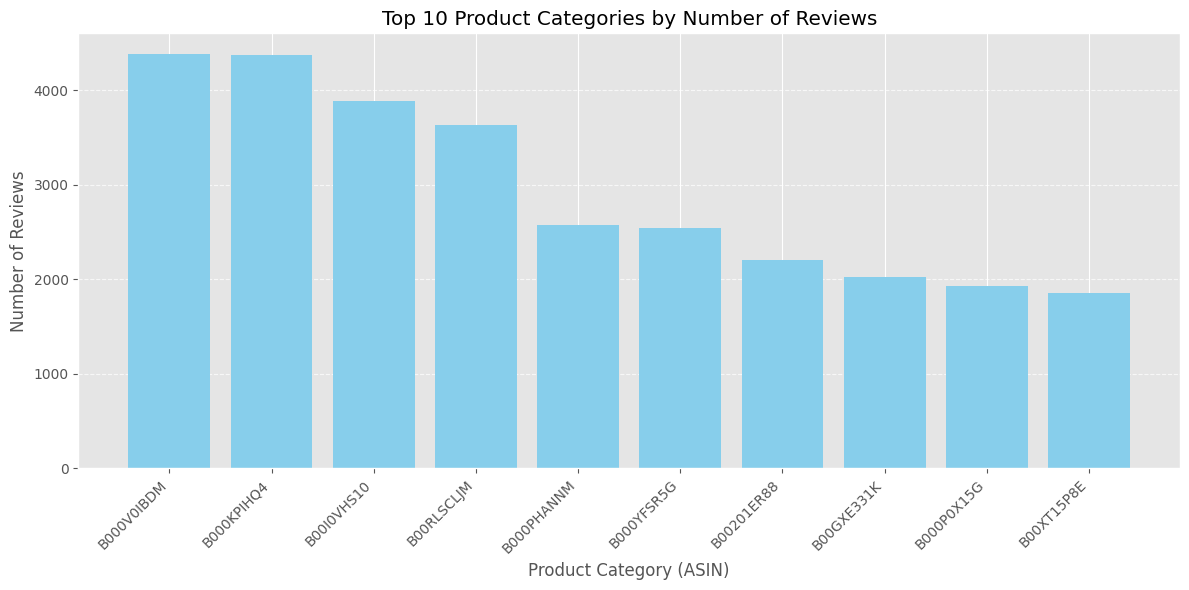

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Convert reviewTime to datetime early in preprocessing
df['reviewTime'] = pd.to_datetime(df['reviewTime'])

# Calculate review text length in a new column
df['reviewLength'] = df['reviewText'].str.len()

# Aggregate to get count and mean of overall rating, and mean of review length
product_stats = df.groupby('asin').agg({
    'overall': ['count', 'mean'],
    'reviewLength': 'mean'
}).reset_index()

# Rename the columns for clarity
product_stats.columns = ['asin', 'review_count', 'average_rating', 'average_review_length']

# Sort by review_count to identify the top N reviewed products
product_stats = product_stats.sort_values(by='review_count', ascending=False)

# Select the top N ASINs for plotting
top_asins = product_stats.head(10)
plt.style.use('ggplot')

# Function to plot bar charts
def plot_bar(data, x_col, y_col, title, xlabel, ylabel, figsize=(12, 6)):
    plt.figure(figsize=figsize)
    plt.bar(data[x_col], data[y_col], color='skyblue')
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.xticks(rotation=45, ha='right')
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.show()

# Plot the top N ASINs against their number of reviews
plot_bar(top_asins, 'asin', 'review_count', 'Top 10 Product Categories by Number of Reviews',
         'Product Category (ASIN)', 'Number of Reviews')


# **c. Distribution of the number of reviews per product**

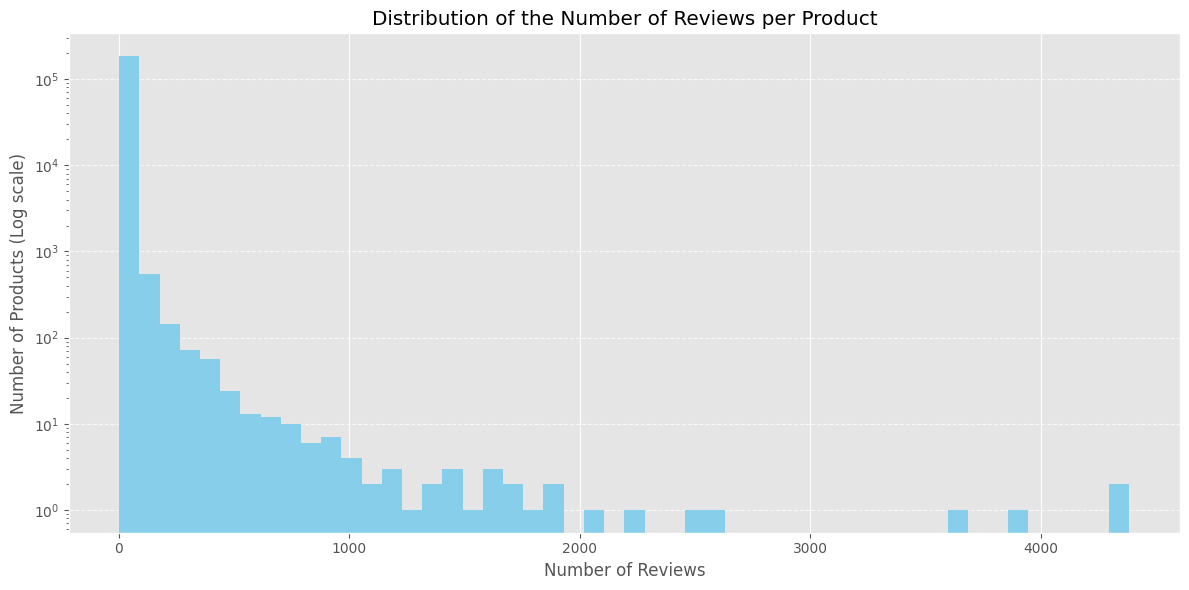

In [ ]:
# Plotting
plt.figure(figsize=(12, 6))
plt.hist(reviews_per_product, bins=50, color='skyblue', log=True)
plt.title('Distribution of the Number of Reviews per Product')
plt.xlabel('Number of Reviews')
plt.ylabel('Number of Products (Log scale)')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# **d. Distribution of reviews per user**

Distribution of reviews per user:
reviewerID
A3G5KDMFNRUXHB    40
A3JBQHQZEZPQK4    36
A1RRX286ZRI830    32
A2PBHVTPTIIGKR    31
A2GP4EJIAA2OE0    29
                  ..
A3F8ZWBOAZUZE2     1
A2HI8EO6V5PST8     1
A3GKQ3VSTGLAHW     1
A3HEDQXYV9OCVR     1
A2RSX9E79DUHRX     1
Name: count, Length: 749233, dtype: int64


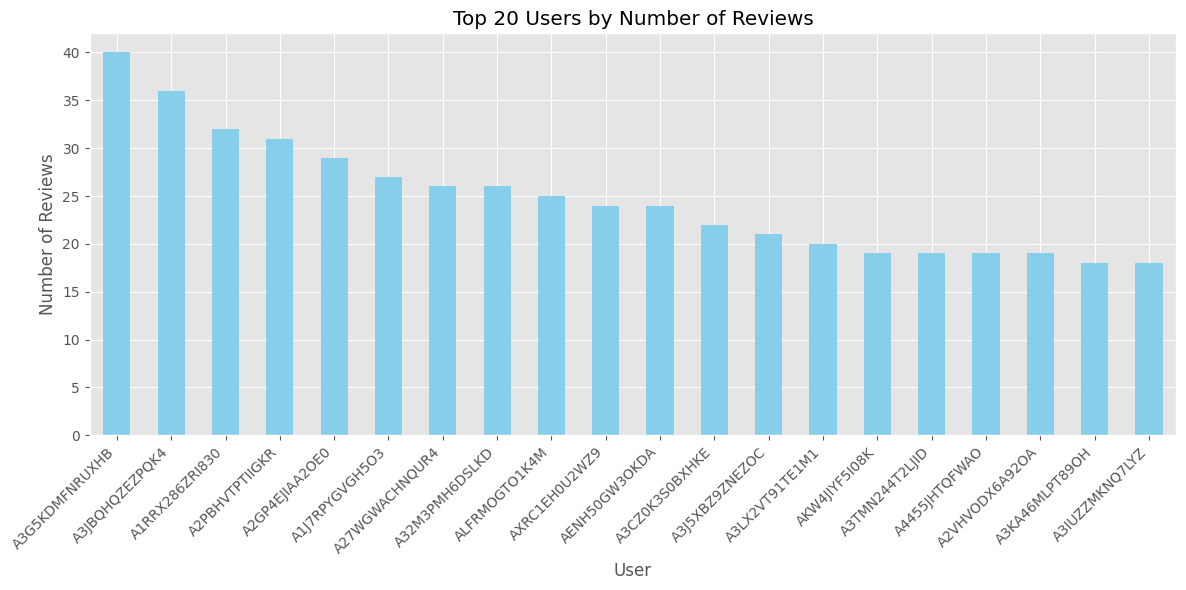

In [ ]:
# Calculate the distribution of reviews per user
reviews_per_user = df['reviewerID'].value_counts()

# Display the distribution
print("Distribution of reviews per user:")
print(reviews_per_user)

# Now let's plot the distribution
# Since there might be a large number of users, we'll plot only the top 20 for clarity
top_reviews_per_user = reviews_per_user.head(20)

plt.figure(figsize=(12, 6))
top_reviews_per_user.plot(kind='bar', color='skyblue')
plt.title('Top 20 Users by Number of Reviews')
plt.xlabel('User')
plt.ylabel('Number of Reviews')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# **e. Review lengths and outliers**

Review length statistics:
count    883636.000000
mean        147.599960
std         202.403431
min           0.000000
25%          36.000000
50%          88.000000
75%         180.000000
max       10565.000000
Name: reviewLength, dtype: float64


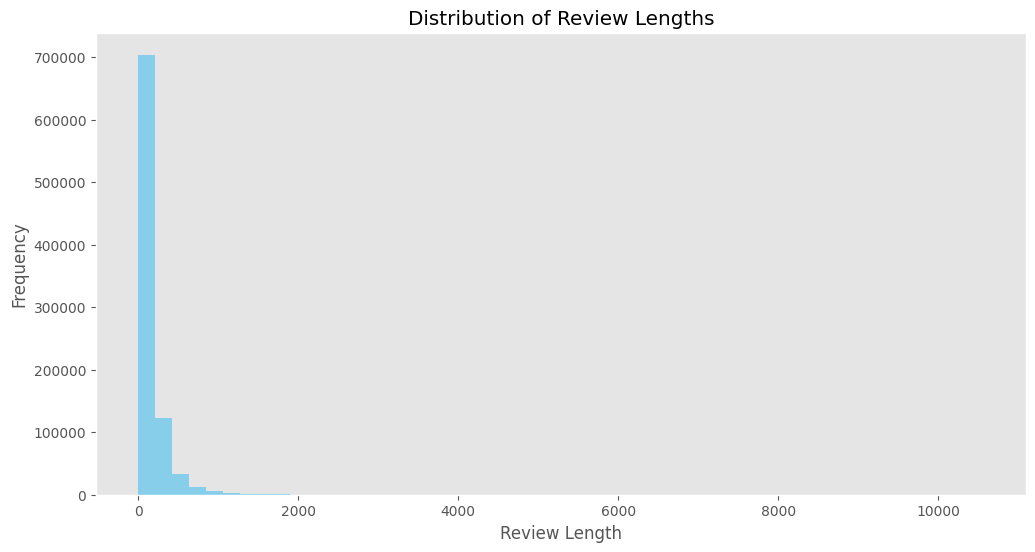

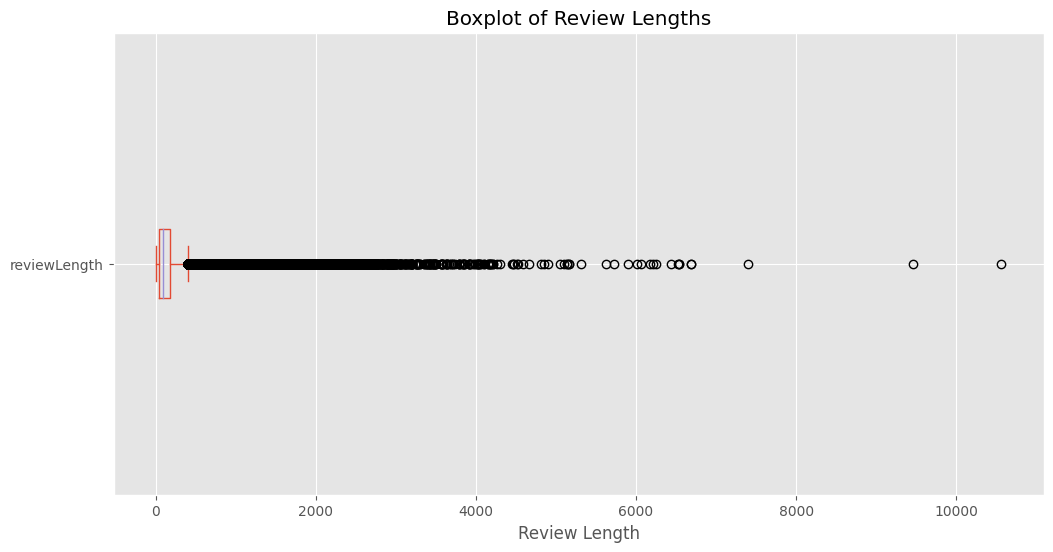

In [ ]:
# Calculate the length of each review
df['reviewLength'] = df['reviewText'].apply(lambda x: len(str(x)))

# Print summary statistics of review lengths
print("Review length statistics:")
print(df['reviewLength'].describe())

# Plot a histogram of review lengths
plt.figure(figsize=(12, 6))
df['reviewLength'].hist(bins=50, color='skyblue')
plt.title('Distribution of Review Lengths')
plt.xlabel('Review Length')
plt.ylabel('Frequency')
plt.grid(False)
plt.show()

# Plot a boxplot of review lengths to identify outliers
plt.figure(figsize=(12, 6))
df['reviewLength'].plot(kind='box', vert=False)
plt.title('Boxplot of Review Lengths')
plt.xlabel('Review Length')
plt.grid(True)
plt.show()


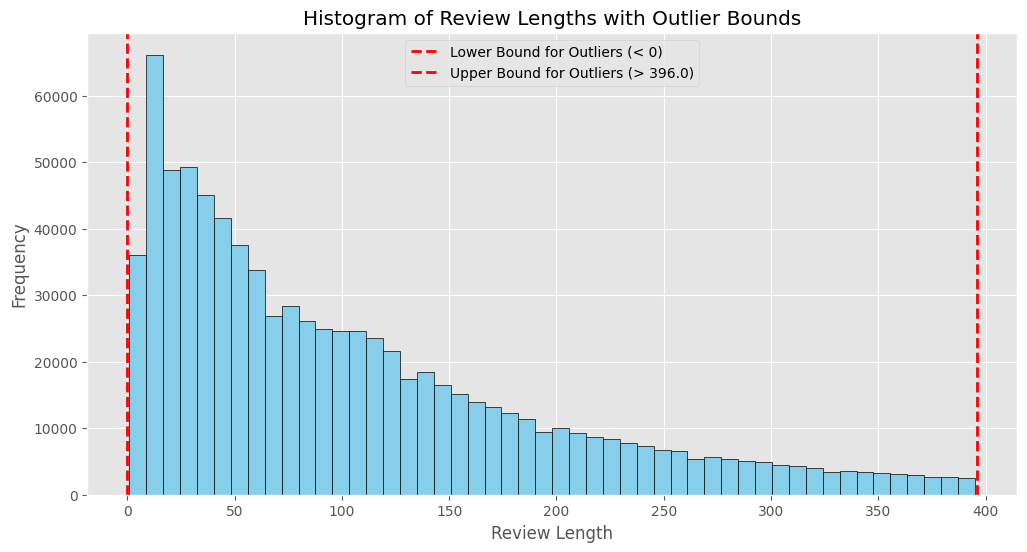

In [ ]:
# Calculate Q1, Q3, and IQR
Q1 = df['reviewLength'].quantile(0.25)
Q3 = df['reviewLength'].quantile(0.75)
IQR = Q3 - Q1

# Define bounds for outliers
lower_bound = max(0, Q1 - 1.5 * IQR)
upper_bound = Q3 + 1.5 * IQR

# Filtering out extreme outliers for the purpose of a more readable histogram
filtered_review_lengths = df['reviewLength'][(df['reviewLength'] > lower_bound) & (df['reviewLength'] < upper_bound)]

# Plotting the histogram with a reasonable range
plt.figure(figsize=(12, 6))
filtered_review_lengths.hist(bins=50, color='skyblue', edgecolor='black')

# Plotting the IQR boundaries
plt.axvline(x=lower_bound, color='red', linestyle='dashed', linewidth=2, label=f'Lower Bound for Outliers (< {lower_bound})')
plt.axvline(x=upper_bound, color='red', linestyle='dashed', linewidth=2, label=f'Upper Bound for Outliers (> {upper_bound})')

plt.title('Histogram of Review Lengths with Outlier Bounds')
plt.xlabel('Review Length')
plt.ylabel('Frequency')
plt.legend()
plt.show()

# **f. Analyzing lengths**

In [ ]:
# Calculating summary lengths using vectorized string operations
summary_lengths = df['summary'].str.len().fillna(0)

# Printing the statistics for summary lengths
print("Summary length statistics: ", summary_lengths.describe())

Summary length statistics:  count    883636.000000
mean         21.601485
std          18.805493
min           0.000000
25%          10.000000
50%          12.000000
75%          28.000000
max         663.000000
Name: summary, dtype: float64


In [ ]:
# Calculate the first quartile (25th percentile)
Q1 = summary_lengths.quantile(0.25)

# Calculate the third quartile (75th percentile)
Q3 = summary_lengths.quantile(0.75)

# Calculate the Interquartile Range (IQR)
IQR = Q3 - Q1

# Define the upper and lower bounds for outliers
upper_bound = Q3 + 1.5 * IQR
lower_bound = Q1 - 1.5 * IQR

# Identify potential outliers
outliers = summary_lengths[(summary_lengths > upper_bound) | (summary_lengths < lower_bound)]

print("Number of potential outliers:", len(outliers))
print("Outlier review lengths: ", outliers)

Number of potential outliers: 61814
Outlier review lengths:  26        65.0
106       81.0
271       95.0
273       56.0
301       57.0
          ... 
883581    67.0
883586    74.0
883623    56.0
883628    62.0
883632    80.0
Name: summary, Length: 61814, dtype: float64


In [ ]:
# Printing the shape of the DataFrame before removing duplicates
print("Shape of DataFrame before removing duplicates:", df.shape)

Shape of DataFrame before removing duplicates: (883636, 12)


# **g. Checking for duplicates**

In [ ]:
# Specifying the columns to convert to string
columns_to_convert = ['reviewTime', 'reviewerID', 'asin', 'style', 'reviewerName', 'reviewText', 'summary']

# Converting specified columns to string
df[columns_to_convert] = df[columns_to_convert].astype(str)

# Identifying duplicate reviews
duplicate_reviews = df[df.duplicated(keep=False)]
print("Number of duplicate reviews:", len(duplicate_reviews))
print(duplicate_reviews)

# Defining the key attributes for identifying duplicates
key_attributes = ['reviewerID', 'asin', 'reviewText', 'reviewTime']

# Dropping duplicates based on key attributes and keeping the first occurrence
df = df.drop_duplicates(subset=key_attributes, keep='first')

# Resetting index after dropping duplicates
df.reset_index(drop=True, inplace=True)

# Printing the new shape of the DataFrame after removing duplicates
print("Shape of DataFrame after removing duplicates:", df.shape)

Number of duplicate reviews: 14520
        overall  verified  reviewTime      reviewerID        asin  \
29553       5.0      True  2010-11-09  A1PS8HORHALRAQ  B000W517WS   
29554       5.0      True  2010-02-02  A34RAEHWWDB31Q  B000W517WS   
29555       4.0      True  2016-10-04  A1ZRQ4Q2138XUV  B000W517WS   
29556       5.0      True  2016-06-29    ARUN6V09RQJQ  B000W517WS   
29557       4.0      True  2016-06-18  A1Z1S9KA5CUJ95  B000W517WS   
...         ...       ...         ...             ...         ...   
356122      5.0      True  2016-10-22  A33WYGN1D9WTKC  B01B2AOT3K   
424160      5.0      True  2015-08-04  A30G2YA89JRSRL  B006HT2ODO   
424161      5.0      True  2015-08-04  A30G2YA89JRSRL  B006HT2ODO   
465323      1.0     False  2015-05-13  A1T01N8KXDV7GN  B00EABZWQC   
465324      1.0     False  2015-05-13  A1T01N8KXDV7GN  B00EABZWQC   

                               reviewerName  \
29553                                     L   
29554                       Amazon Custome

In [ ]:
# Removing reviews or rows that come from "unverified" users
# Filtering out rows where "verified" is False
df = df[df['verified']]

# Resetting index after filtering
df.reset_index(drop=True, inplace=True)

# Printing the new shape of the DataFrame after filtering
print("Shape of DataFrame after removing unverified reviews:", df.shape)

Shape of DataFrame after removing unverified reviews: (821660, 12)


# **2. Text basic pre-processing**

In [ ]:
# Function for labeling the data based on the value of "rating of the product"
def label_sentiment(rating):
    if rating >= 4:
        return 'Positive'
    elif rating == 3:
        return 'Neutral'
    else:
        return 'Negative'

In [ ]:
# Applying label_sentiment function to create a new column 'sentiment'
df['sentiment'] = df['overall'].apply(label_sentiment)

We'll choose 'reviewText' and 'summary' columns for sentiment analysis. These columns typically contain the main content of the reviews, which can provide insights into sentiment.

In [ ]:
# Choosing appropriate columns for sentiment analysis
sentiment_analysis_col = ['reviewText', 'summary', 'sentiment']
df_sentiment = df[sentiment_analysis_col]

In [ ]:
# Checking for outliers in review lengths
# Here, we'll consider the length of the 'reviewText' column as the basis for outlier detection.

# Calculating review lengths
review_lengths = df_sentiment['reviewText'].fillna('').apply(len)

# Calculating the first quartile (25th percentile)
Q1 = review_lengths.quantile(0.25)

# Calculating the third quartile (75th percentile)
Q3 = review_lengths.quantile(0.75)

# Calculating the Interquartile Range (IQR)
IQR = Q3 - Q1

# Defining the upper and lower bounds for outliers
upper_bound = Q3 + 1.5 * IQR
lower_bound = Q1 - 1.5 * IQR

# Identifying potential outliers
outliers = review_lengths[(review_lengths > upper_bound) | (review_lengths < lower_bound)]

print("Number of potential outliers:", len(outliers))
print("Outlier review lengths: ", outliers)

Number of potential outliers: 56332
Outlier review lengths:  7          928
12         441
51         698
59         669
82         408
          ... 
821575     378
821592    1204
821612     439
821616     604
821635     389
Name: reviewText, Length: 56332, dtype: int64


# **11. Modeling (Sentiment Analysis) Machine Learning approach**

In [ ]:
# a. Select a subset of the original data with a minimum of 2000 reviews
# Check if the total number of reviews exceeds 2000
if len(df) > 2000:
    df_subset = df.sample(n=2000, random_state=1)  # Random state for reproducibility
else:
    df_subset = df  # Use the entire dataset if it contains 2000 reviews or less

df_subset.shape

(2000, 13)

In [ ]:
# b. Data Exploration: Review data types and identify missing values
data_types = df_subset.dtypes
missing_values = df_subset.isnull().sum()

# Summary statistics for numerical columns
numerical_summary = df_subset.describe()

data_types, missing_values, numerical_summary

(overall                 float64
 verified                   bool
 reviewTime               object
 reviewerID               object
 asin                     object
 reviewerName             object
 reviewText               object
 summary                  object
 unixReviewTime            int64
 style                    object
 reviewQuarter     period[Q-DEC]
 reviewLength              int64
 sentiment                object
 dtype: object,
 overall           0
 verified          0
 reviewTime        0
 reviewerID        0
 asin              0
 reviewerName      0
 reviewText        0
 summary           0
 unixReviewTime    0
 style             0
 reviewQuarter     0
 reviewLength      0
 sentiment         0
 dtype: int64,
            overall  unixReviewTime  reviewLength
 count  2000.000000    2.000000e+03   2000.000000
 mean      3.856500    1.459756e+09    130.221500
 std       1.449468    3.956237e+07    165.278758
 min       1.000000    1.134000e+09      2.000000
 25%       3.0000

In [ ]:
from datetime import datetime

# Pre-processing
# Convert 'reviewTime' to datetime format
df_subset['reviewTime'] = pd.to_datetime(df_subset['reviewTime'])

# Create a 'reviewLength' column
df_subset['reviewLength'] = df_subset['reviewText'].apply(lambda x: len(str(x)))


# Text Preprocessing
# Lowercasing
df_subset['reviewText'] = df_subset['reviewText'].apply(lambda x: x.lower())
df_subset['summary'] = df_subset['summary'].apply(lambda x: x.lower())

# Checking the final shape and some rows to ensure preprocessing steps were applied
final_shape = df_subset.shape
preprocessed_sample = df_subset[['reviewText', 'summary', 'reviewTime', 'reviewLength']].head()

final_shape, preprocessed_sample

((2000, 13),
                                                reviewText  \
 587617  fits a tiny bit large but still wearable. i'm ...   
 661531  short in the arms but overall very warm! used ...   
 183238         item as described, great seller. thank you   
 83959                 i expected the socks to be longer -   
 431932  i received this item on time, and it matched t...   
 
                                                   summary reviewTime  \
 587617                                              great 2016-05-09   
 661531  used for mn winter this year and my head was n... 2016-03-14   
 183238                                great seller. thank 2015-07-07   
 83959                                          four stars 2015-01-15   
 431932           beautiful scarf but arrived with a stain 2015-01-07   
 
         reviewLength  
 587617           122  
 661531           354  
 183238            42  
 83959             35  
 431932           568  )

In [ ]:
# Text Normalization
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize

nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

def normalize_text(text):
    # Tokenize text
    word_tokens = word_tokenize(text)
    # Remove stop words and apply lemmatization
    filtered_sentence = [lemmatizer.lemmatize(w) for w in word_tokens if not w in stop_words]
    return " ".join(filtered_sentence)

# Apply normalization to reviewText and summary
df_subset['reviewText'] = df_subset['reviewText'].apply(normalize_text)
df_subset['summary'] = df_subset['summary'].apply(normalize_text)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [ ]:
# Handling Categorical Variables
# One-hot encoding of 'style' and 'sentiment'
style_encoded = pd.get_dummies(df_subset['style'], prefix='style')
sentiment_encoded = pd.get_dummies(df_subset['sentiment'], prefix='sentiment')

# Concatenate with the original DataFrame
df_ml = pd.concat([df_subset, style_encoded, sentiment_encoded], axis=1)

# Drop original 'style' and 'sentiment' columns
df_ml.drop(['style', 'sentiment'], axis=1, inplace=True)

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Combine reviewText and summary into a single text column for TF-IDF transformation
df_ml['combined_text'] = df_ml['reviewText'] + " " + df_ml['summary']
print(df_ml['combined_text'].shape)

# Initialize TF-IDF Vectorizer
tfidf_vectorizer = TfidfVectorizer(max_features=1000,  # Limit the number of features to keep
                                   min_df=5,  # Only consider terms that appear in at least 5 documents
                                   max_df=0.7)  # Ignore terms that appear in more than 70% of the documents

# Fit and transform the combined_text column to create the TF-IDF feature matrix
tfidf_matrix = tfidf_vectorizer.fit_transform(df_ml['combined_text'])

(2000,)


In [ ]:
# ---- mahfuz
# print(df_ml['reviewText'])
# print(df_ml['summary'])
# print(df_ml['combined_text'])


In [ ]:
# d.
from sklearn.model_selection import train_test_split

# Extracting the 'overall' rating as the target variable
y = df_ml['overall']

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(tfidf_matrix, y,
                                                    test_size=0.3,  # 30% of the data goes to the test set
                                                    random_state=42,  # For reproducibility
                                                    stratify=y)  # Stratify by 'overall' ratings

# ======================== Models ====================
# Creating 2 Models - Logistic Regression & SVM

In [ ]:
# Model 1: Logistic Regression

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

# Initialize the Logistic Regression model
log_reg = LogisticRegression(random_state=42, max_iter=1000)

# Train the model
log_reg.fit(X_train, y_train)

# Predict on the testing set
y_pred_log_reg = log_reg.predict(X_test)

# Evaluate the model
accuracy_log_reg = accuracy_score(y_test, y_pred_log_reg)
print("Logistic Regression Accuracy:", accuracy_log_reg)
print(classification_report(y_test, y_pred_log_reg))

Logistic Regression Accuracy: 0.7166666666666667
              precision    recall  f1-score   support

         1.0       0.75      0.66      0.70        80
         2.0       0.90      0.39      0.55        46
         3.0       0.69      0.40      0.51        63
         4.0       0.64      0.36      0.46       103
         5.0       0.72      0.96      0.82       308

    accuracy                           0.72       600
   macro avg       0.74      0.55      0.61       600
weighted avg       0.72      0.72      0.69       600



In [ ]:
# Model 2: Support Vector Machine (SVM)

from sklearn.svm import SVC

# Initialize the SVM model
svm_model = SVC(kernel='linear', random_state=42)

# Train the model
svm_model.fit(X_train, y_train)

# Predict on the testing set
y_pred_svm = svm_model.predict(X_test)

# Evaluate the model
accuracy_svm = accuracy_score(y_test, y_pred_svm)
print("SVM Accuracy:", accuracy_svm)
print(classification_report(y_test, y_pred_svm))


SVM Accuracy: 0.7083333333333334
              precision    recall  f1-score   support

         1.0       0.73      0.70      0.71        80
         2.0       0.80      0.43      0.56        46
         3.0       0.55      0.41      0.47        63
         4.0       0.61      0.32      0.42       103
         5.0       0.73      0.94      0.82       308

    accuracy                           0.71       600
   macro avg       0.68      0.56      0.60       600
weighted avg       0.70      0.71      0.68       600



In [ ]:
# 12. The results of the training process

# Print training results
print("Training Results:")
print("Logistic Regression Accuracy:", log_reg.score(X_train, y_train))
print("SVM Accuracy:", svm_model.score(X_train, y_train))

Training Results:
Logistic Regression Accuracy: 0.8364285714285714
SVM Accuracy: 0.8828571428571429


# ======= Testing & Evaluating - New Data =========
# Testing & Evaluating the models with New Test Data

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, f1_score

# Testing the models on the -------- new test data
logistic_predictions = log_reg.predict(X_test)
svm_predictions = svm_model.predict(X_test)

# Evaluating performance metrics
print("\n Performance Metrics - Logistic Regression:")
print("Logistic Regression Accuracy:", accuracy_score(y_test, logistic_predictions))
print("Logistic Regression Precision:", precision_score(y_test, logistic_predictions, average='weighted'))
print("Logistic Regression Recall:", recall_score(y_test, logistic_predictions, average='weighted'))
print("Logistic Regression F1 Score:", f1_score(y_test, logistic_predictions, average='weighted'))
print("Confusion Matrix (Logistic Regression):\n", confusion_matrix(y_test, logistic_predictions))

print("\n\n Performance Metrics - SVM:")
print("\nSVM Accuracy:", accuracy_score(y_test, svm_predictions))
print("SVM Precision:", precision_score(y_test, svm_predictions, average='weighted'))
print("SVM Recall:", recall_score(y_test, svm_predictions, average='weighted'))
print("SVM F1 Score:", f1_score(y_test, svm_predictions, average='weighted'))
print("Confusion Matrix (SVM):\n", confusion_matrix(y_test, svm_predictions))


 Performance Metrics - Logistic Regression:
Logistic Regression Accuracy: 0.7166666666666667
Logistic Regression Precision: 0.7183321713273687
Logistic Regression Recall: 0.7166666666666667
Logistic Regression F1 Score: 0.6890921489446685
Confusion Matrix (Logistic Regression):
 [[ 53   0   2   4  21]
 [ 10  18   6   1  11]
 [  5   2  25   8  23]
 [  2   0   1  37  63]
 [  1   0   2   8 297]]


 Performance Metrics - SVM:

SVM Accuracy: 0.7083333333333334
SVM Precision: 0.6962745533293526
SVM Recall: 0.7083333333333334
SVM F1 Score: 0.6824280146885713
Confusion Matrix (SVM):
 [[ 56   1   5   4  14]
 [  9  20   7   2   8]
 [  4   4  26   6  23]
 [  2   0   6  33  62]
 [  6   0   3   9 290]]


# ======== Testing & Evaluating - Old Data ========
# Testing & Evaluating the models with Old Phase-1's Data

In [ ]:
# Important:
# 'random_subset_3.json' has 4 columns -
# and imported from Phase-1 to Test and Evaluate this 2 ML model with Same data that
# we used in Phase-1 to test Lexicon Models.
df_sentiment = pd.read_json("/content/random_subset_3.json")
print(df_sentiment.columns)

# Combine text data for vectorization
df_sentiment['combined_text'] = df_sentiment['reviewText'] + " " + df_sentiment['summary']

# Transform the text data using the existing tfidf_vectorizer
X_sentiment_tfidf = tfidf_vectorizer.transform(df_sentiment['combined_text'] )
# Initialize a new TfidfVectorizer and fit it to the test data using the vocabulary learned from the original vectorizer
new_tfidf_vectorizer = TfidfVectorizer(vocabulary=tfidf_vectorizer.vocabulary_)
X_sentiment_tfidf = new_tfidf_vectorizer.fit_transform(df_sentiment['combined_text'] )

y_sentiment_old_data = df_sentiment['overall']

# Testing the models on the -------- Phase-1's Test Data
svm_predictions_old_data = svm_model.predict(X_sentiment_tfidf)
logistic_predictions_old_data = log_reg.predict(X_sentiment_tfidf)

# Evaluating performance metrics with Phase-1's data

print("\nPerformance Metrics - Logistic Regression: Old Data")
print("Logistic Regression Accuracy:", accuracy_score(y_sentiment_old_data, logistic_predictions_old_data))
print("Logistic Regression Precision:", precision_score(y_sentiment_old_data, logistic_predictions_old_data, average='weighted'))
print("Logistic Regression Recall:", recall_score(y_sentiment_old_data, logistic_predictions_old_data, average='weighted'))
print("Logistic Regression F1 Score:", f1_score(y_sentiment_old_data, logistic_predictions_old_data, average='weighted'))
print("Confusion Matrix (Logistic Regression):\n", confusion_matrix(y_sentiment_old_data, logistic_predictions_old_data))

print("\n\nPerformance Metrics - SVM: Old Data")
print("SVM Regression Accuracy:", accuracy_score(y_sentiment_old_data, svm_predictions_old_data))
print("SVM Regression Precision:", precision_score(y_sentiment_old_data, svm_predictions_old_data, average='weighted'))
print("SVM Regression Recall:", recall_score(y_sentiment_old_data, svm_predictions_old_data, average='weighted'))
print("SVM Regression F1 Score:", f1_score(y_sentiment_old_data, svm_predictions_old_data, average='weighted'))
print("Confusion Matrix (SVM Regression):\n", confusion_matrix(y_sentiment_old_data, svm_predictions_old_data))


Index(['reviewText', 'summary', 'sentiment', 'overall'], dtype='object')

Performance Metrics - Logistic Regression: Old Data
Logistic Regression Accuracy: 0.792
Logistic Regression Precision: 0.7740562640121962
Logistic Regression Recall: 0.792
Logistic Regression F1 Score: 0.7597709776140653
Confusion Matrix (Logistic Regression):
 [[ 27   0   0   3   4]
 [  4   2   3   0  11]
 [  7   4  26   6  65]
 [  0   0   8  65  74]
 [  7   0   5   7 672]]


Performance Metrics - SVM: Old Data
SVM Regression Accuracy: 0.803
SVM Regression Precision: 0.8000255981775053
SVM Regression Recall: 0.803
SVM Regression F1 Score: 0.7785729907869403
Confusion Matrix (SVM Regression):
 [[ 30   0   3   0   1]
 [  7   2   2   0   9]
 [  9   4  41   2  52]
 [  3   3   8  60  73]
 [  9   0   5   7 670]]


In [ ]:
from textblob import TextBlob

# Load data from a gzipped JSON file
def load_data(filepath):
    data = []
    with gzip.open(filepath, 'rt', encoding='utf-8') as f:
        for line in f:
            data.append(json.loads(line.strip()))
    return pd.DataFrame(data)

# Preprocess text (simple lowercasing and stripping)
def preprocess_text(text):
    if pd.isna(text):
        return ""  # Return an empty string if the text is NaN
    return text.lower().strip()

# Analyze sentiment of the text using TextBlob
def analyze_sentiment(text):
    blob = TextBlob(text)
    return blob.sentiment.polarity

# Enhance ratings based on sentiment analysis
def enhance_ratings_with_sentiment(df):
    # Load a pre-trained sentiment analysis model
    # Pretrained model is essentially TextBlob itself as it's built-in
    df['clean_text'] = df['reviewText'].apply(preprocess_text)
    df['sentiment_score'] = df['clean_text'].apply(analyze_sentiment)
    df['enhanced_rating'] = df.apply(lambda row: adjust_rating(row['overall'], row['sentiment_score']), axis=1)
    return df

# Adjust rating based on sentiment score
def adjust_rating(original_rating, sentiment_score):
    if sentiment_score > 0.1:  # Positive sentiment
        return min(original_rating + 1, 5)
    elif sentiment_score < -0.1:  # Negative sentiment
        return max(original_rating - 1, 1)
    return original_rating

# Enhance ratings
df_enhanced = enhance_ratings_with_sentiment(df)

# Print some of the enhanced ratings to see the adjustments
print(df_enhanced[['reviewText', 'overall', 'sentiment_score', 'enhanced_rating']].head())


                                          reviewText  overall  \
0                             Exactly what I needed.      5.0   
1  I agree with the other review, the opening is ...      2.0   
2                                too tiny an opening      2.0   
3                             Exactly what I wanted.      5.0   
4  These little plastic backs work great.  No mor...      4.0   

   sentiment_score  enhanced_rating  
0          0.25000              5.0  
1         -0.15500              1.0  
2          0.00000              2.0  
3          0.25000              5.0  
4          0.23125              5.0  


In [ ]:
from transformers import pipeline

# Select reviews with more than 100 words
def select_long_reviews(df, min_words=100, num_reviews=10):
    df['word_count'] = df['reviewText'].apply(lambda text: len(str(text).split()))
    long_reviews = df[df['word_count'] > min_words].head(num_reviews)
    return long_reviews[['reviewText']]

# Initialize Hugging Face summarization model
def initialize_summarizer(model_name="sshleifer/distilbart-cnn-12-6"):
    summarizer = pipeline("summarization", model=model_name)
    return summarizer

# Summarize reviews
def summarize_reviews(reviews, summarizer, max_length=50):
    summaries = [summarizer(review, max_length=max_length, min_length=30, do_sample=False)[0]['summary_text'] for review in reviews]
    return summaries

# Select 10 long reviews
long_reviews = select_long_reviews(df)

# Initialize the summarization model
summarizer = initialize_summarizer()

# Summarize the selected reviews
long_reviews['summary'] = summarize_reviews(long_reviews['reviewText'], summarizer)

# Print the original reviews and their summaries
for index, row in long_reviews.iterrows():
    print(f"Original Review {index+1}: {row['reviewText']}")
    print(f"Summary {index+1}: {row['summary']}\n")

    # Note the results of the first two reviews
    if index == 1:
        break

Original Review 8: I had used my last el-cheapo fake leather cigarette case for SEVEN YEARS. It still closed completely but the plastic made to look like leather was literally falling off, so it was time for a new one. Cigarette cases for kings size cigs are not easy to come by these days I discovered, but I was thrilled to find this one on Amazon. It was a great price, REAL LEATHER, and even had the cool zipper pouch on the back. I was so excited to get my case and toss that other one! Well, within THREE DAYS one of the gold clasps literally broke off! I couldn't believe it! I tried to super glue it back on and was not successful. so, I still use the case but it doesn't close securely. I was very disappointed that my $3.00 plastic one lasted 7 years and this real nice leather one lasted 3 days!! But I still love the zipper pouch on the back, it's great for the spare key to my car because I will not go ANYWHERE without my cigarettes!
Summary 8:  Cigarette cases for kings size cigs are 

In [ ]:
import random
from transformers import pipeline, AutoModelForCausalLM, AutoTokenizer

# Function to identify a random review that includes a question
def find_question_review(df):
    question_words = ['?', 'what', 'how', 'can', 'do', 'does', 'is']
    potential_questions = []

    for index, row in df.iterrows():
        text = str(row['reviewText']).lower()  # Ensure the text is a string
        if any(qw in text for qw in question_words):
            potential_questions.append(text)

    if potential_questions:
        return random.choice(potential_questions)
    else:
        return "No question-like review found"  # Return this if no question-like review is found

# Function to initialize the model for generating responses
def initialize_response_model(model_name="microsoft/DialoGPT-medium"):
    tokenizer = AutoTokenizer.from_pretrained(model_name)
    model = AutoModelForCausalLM.from_pretrained(model_name)
    return tokenizer, model

# Function to generate a response to a question
def generate_response(question, tokenizer, model):
    inputs = tokenizer.encode(question + tokenizer.eos_token, return_tensors="pt")
    reply_ids = model.generate(inputs, max_length=200, num_return_sequences=1, temperature=0.85)
    reply = tokenizer.decode(reply_ids[0], skip_special_tokens=True)
    # Remove any repeated text that matches the input
    if question.lower() in reply.lower():
        reply = reply.replace(question, "").strip()
    return reply


# Initialize model and tokenizer for response generation
tokenizer, model = initialize_response_model()

# Find a random question review
question_review = find_question_review(df)

# Generate a response if a question review is found
response = generate_response(question_review, tokenizer, model) if question_review != "No question-like review found" else "No response needed."

# Print formatted output
print(f"-Question Review: {question_review}")
print(f"-Generated Response: {response}")

The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
A decoder-only architecture is being used, but right-padding was detected! For correct generation results, please set `padding_side='left'` when initializing the tokenizer.


-Question Review: hard to describe something that i just wore once, and never want to wear again.
i kind of wonder why i bought this in the first.  it's good to fit a pencil.
-Generated Response: I'm not sure if you're being serious or not, but I'm pretty sure that's a joke.
